## Data Preprocessing and Feature Engineering

In [ ]:
# Importing needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import ADASYN

from scipy.stats import ttest_ind

In [2]:
# Reading the raw data 
file_path = "../data/raw/data.csv"
df = pd.read_csv(file_path)

### Displaying The First Few Rows, Dimensions, and Column Names of The Dataset

In [5]:
# Looking at the raw data

df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [6]:
# Shape of data

df.shape

(6819, 96)

In [7]:
# Displaying column names

df.columns.tolist()

['Bankrupt?',
 ' ROA(C) before interest and depreciation before interest',
 ' ROA(A) before interest and % after tax',
 ' ROA(B) before interest and depreciation after tax',
 ' Operating Gross Margin',
 ' Realized Sales Gross Margin',
 ' Operating Profit Rate',
 ' Pre-tax net Interest Rate',
 ' After-tax net Interest Rate',
 ' Non-industry income and expenditure/revenue',
 ' Continuous interest rate (after tax)',
 ' Operating Expense Rate',
 ' Research and development expense rate',
 ' Cash flow rate',
 ' Interest-bearing debt interest rate',
 ' Tax rate (A)',
 ' Net Value Per Share (B)',
 ' Net Value Per Share (A)',
 ' Net Value Per Share (C)',
 ' Persistent EPS in the Last Four Seasons',
 ' Cash Flow Per Share',
 ' Revenue Per Share (Yuan ¥)',
 ' Operating Profit Per Share (Yuan ¥)',
 ' Per Share Net profit before tax (Yuan ¥)',
 ' Realized Sales Gross Profit Growth Rate',
 ' Operating Profit Growth Rate',
 ' After-tax Net Profit Growth Rate',
 ' Regular Net Profit Growth Rate',
 ' C

### Missing Values

In [8]:
# Providing detailed metadata about the dataset
 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

All the feature are non-null. There is no missing values.
93 variables are continuous. Bankrupt?, our response, is categorical with two classes. We have two other categorical variables. 

In [20]:
# Defining Predictors and target

predictors = df.drop(columns=['Bankrupt?'])
target = df['Bankrupt?']

In [21]:
# Simplifying columns names to Xi

col_names_dict = {}

for i in range(predictors.shape[1]):
    col_names_dict[f"X{i+1}"] = predictors.columns.tolist()[i]

predictors.columns = [f"X{i+1}" for i in range(predictors.shape[1])]

col_names_dict

{'X1': ' ROA(C) before interest and depreciation before interest',
 'X2': ' ROA(A) before interest and % after tax',
 'X3': ' ROA(B) before interest and depreciation after tax',
 'X4': ' Operating Gross Margin',
 'X5': ' Realized Sales Gross Margin',
 'X6': ' Operating Profit Rate',
 'X7': ' Pre-tax net Interest Rate',
 'X8': ' After-tax net Interest Rate',
 'X9': ' Non-industry income and expenditure/revenue',
 'X10': ' Continuous interest rate (after tax)',
 'X11': ' Operating Expense Rate',
 'X12': ' Research and development expense rate',
 'X13': ' Cash flow rate',
 'X14': ' Interest-bearing debt interest rate',
 'X15': ' Tax rate (A)',
 'X16': ' Net Value Per Share (B)',
 'X17': ' Net Value Per Share (A)',
 'X18': ' Net Value Per Share (C)',
 'X19': ' Persistent EPS in the Last Four Seasons',
 'X20': ' Cash Flow Per Share',
 'X21': ' Revenue Per Share (Yuan ¥)',
 'X22': ' Operating Profit Per Share (Yuan ¥)',
 'X23': ' Per Share Net profit before tax (Yuan ¥)',
 'X24': ' Realized 

In [25]:
predictors.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


### Outlier Detection 

Descriptive and exploratory data analysis illustrate the presence of outliers in each variable. Below, we demonstrate that there are extreme values which cannot be ignored and similar values are observed in financial data.

#### Isolation Forest model

In [26]:
# Fit the Isolation Forest model for Outlier Detection

iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_labels = iso_forest.fit_predict(predictors.select_dtypes(include=['float']))

# Displaying outlier observations

print("Outliers detected by Isolation Forest:")
predictors[outlier_labels == -1]

Outliers detected by Isolation Forest:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
56,0.066933,0.057185,0.054821,0.601861,0.601861,0.998825,0.796779,0.808717,0.302760,0.780927,...,0.525651,0.005803,0.623648,0.601857,1.000000,0.182790,0.026763,0.565021,1,0.009178
379,0.453956,0.516082,0.501740,0.665151,0.665151,0.996295,0.776710,0.761550,0.272989,0.759283,...,0.764289,0.003736,0.679350,0.665149,0.831484,0.307015,0.026351,0.561557,1,0.013225
427,0.311315,0.279655,0.360887,0.598293,0.598293,0.998511,0.796186,0.808234,0.302381,0.780718,...,0.542326,0.000456,0.623593,0.598295,0.000000,0.745352,0.026749,0.564949,1,0.010437
448,0.364842,0.318415,0.393115,0.494249,0.494249,0.996804,0.789248,0.801097,0.293829,0.776307,...,0.629384,0.000783,0.622187,0.494250,0.820388,0.285070,0.026762,0.565015,1,0.019550
527,0.392385,0.432621,0.451470,0.555939,0.555939,0.998291,0.796273,0.808449,0.302992,0.780788,...,0.728649,0.001388,0.625402,0.555936,0.831774,0.285768,0.026705,0.564709,1,0.018963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,0.556184,0.612843,0.600460,0.597025,0.597025,0.998998,0.797488,0.809393,0.303636,0.781656,...,0.837317,0.448819,0.623870,0.597020,0.843384,0.279715,0.026809,0.565242,1,0.029463
6700,0.294252,0.353195,0.324268,0.621507,0.621507,0.998777,0.796607,0.808556,0.302560,0.780663,...,0.663710,0.000219,0.623738,0.621505,0.818086,0.291992,0.026747,0.564940,1,0.015824
6731,0.507239,0.572830,0.559077,0.596225,0.596225,0.998978,0.797430,0.809350,0.303577,0.781612,...,0.816853,1.000000,0.623650,0.596225,0.842400,0.284332,0.026802,0.565211,1,0.020263
6753,0.584849,0.652584,0.637936,0.621780,0.621780,0.999208,0.797689,0.809574,0.303548,0.781853,...,0.853173,0.000982,0.623640,0.621780,0.847107,0.285862,0.026791,0.565158,1,0.018890


Isolation Forest isolates data points by recursively splitting data using random decision trees. Normal points require more splits to be isolated, as they cluster together. Outliers are isolated quickly because they are far from other points. The algorithm is Useful in detecting anomalies in datasets with continuous features. Handles high-dimensional data and is robust to noise.

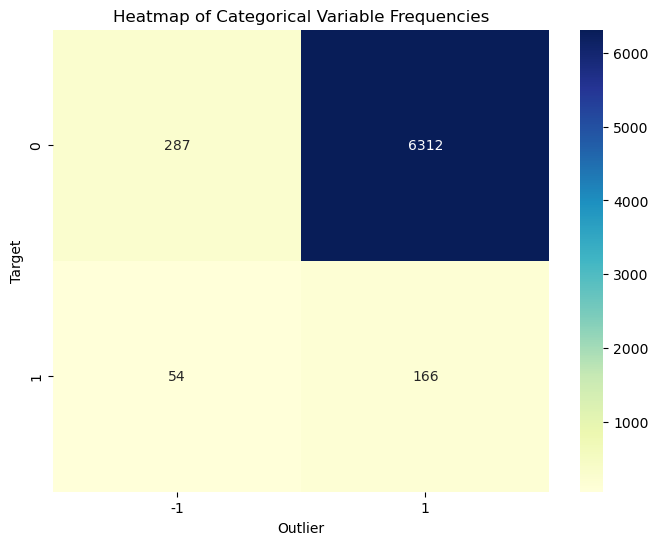

In [ ]:
# Create a contingency table

contingency_table = pd.crosstab(df['Bankrupt?'], outlier_labels)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Categorical Variable Frequencies')
plt.xlabel('Outlier')
plt.ylabel('Target')
plt.show()


As shown in the plot, nearly 30% of the data in the bankrupt group are labeled as outliers, indicating that these extreme values are associated with bankruptcy.

In [28]:
# Quantile method to illustrate the frequency of outliers of the predictors

# Function to calculate the frequency of outliers using the IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

# Apply the function to all numerical columns
outlier_frequencies = {}
for column in predictors.select_dtypes(include=['float']).columns:
    outlier_frequencies[column] = detect_outliers_iqr(predictors, column)

# Convert to a DataFrame for better readability
outlier_frequencies_df = pd.DataFrame.from_dict(outlier_frequencies, orient='index', columns=['Outlier Frequency'])

# Display the results
print("Frequency of Outliers per Variable:")
outlier_frequencies_df

Frequency of Outliers per Variable:


,Outlier Frequency
X1,391
X2,561
X3,432
X4,320
X5,318
...,...
X90,571
X91,404
X92,1503
X93,1421


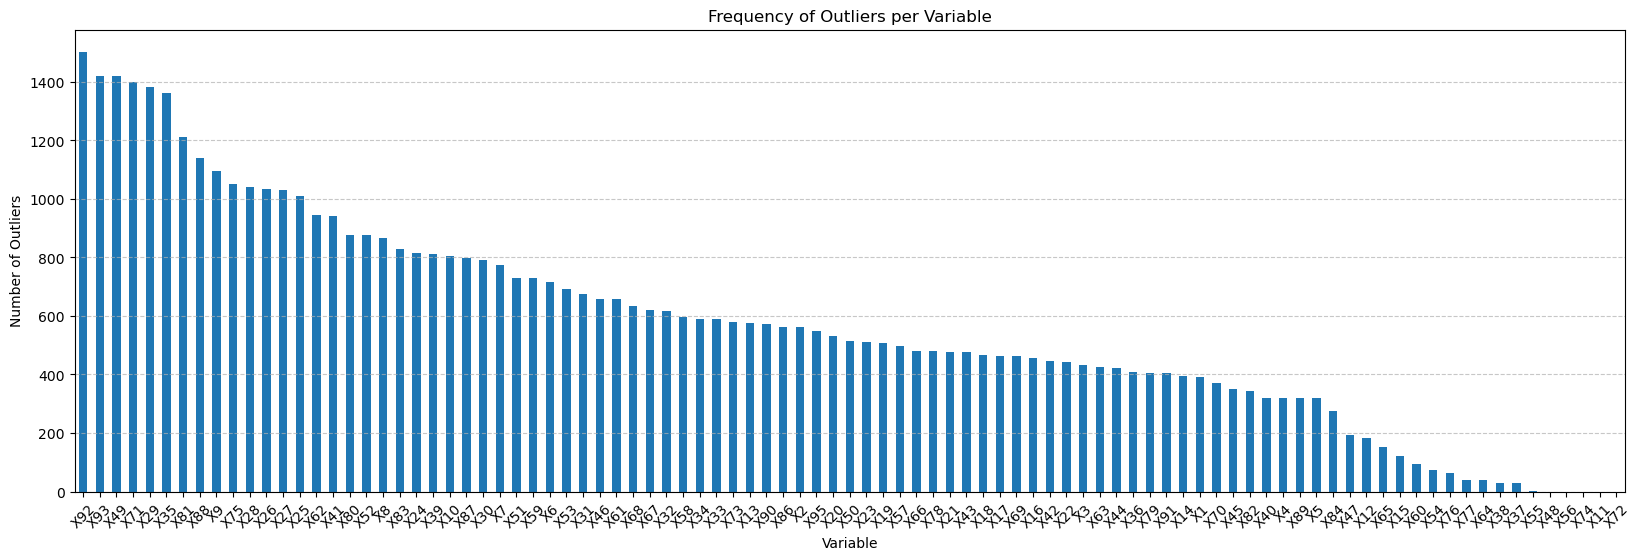

In [30]:
# Visualize the outlier frequencies
outlier_frequencies_df.sort_values(by='Outlier Frequency', ascending=False).plot(kind='bar', figsize=(20, 6), legend=False)
plt.title('Frequency of Outliers per Variable')
plt.xlabel('Variable')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Identifing and Removing Variables with Constant Values

In [32]:
# Calculate the standard deviation of each column
std_deviation = predictors.std()

# Identify columns with std = 0
zero_std_columns = std_deviation[std_deviation == 0].index

print(f"Columns with zero standard deviation: {zero_std_columns.tolist()}")

Columns with zero standard deviation: ['X94']


In [33]:
# Drop these columns from the DataFrame
predictors = predictors.drop(columns=zero_std_columns)

predictors.shape

(6819, 94)

### Detect Collinearity Among Predictors
#### Correlation Matrix  

In [34]:
# Calculate the correlation matrix
correlation_matrix = predictors.corr()
correlation_matrix

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X85,X86,X87,X88,X89,X90,X91,X92,X93,X95
X1,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,0.051328,...,-0.109272,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,0.052416
X2,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,0.049909,...,-0.156890,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,0.057887
X3,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,0.052261,...,-0.120680,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,0.056430
X4,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,0.029430,...,-0.032930,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,0.120029
X5,0.332755,0.324956,0.331755,0.999518,1.000000,0.005610,0.032232,0.026851,0.051242,0.029166,...,-0.032920,0.298155,0.022750,0.004038,0.999518,0.074891,-0.085407,-0.011268,-0.001158,0.120196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X90,0.274287,0.291744,0.280617,0.075304,0.074891,0.006216,0.011343,0.010648,0.007693,0.011191,...,0.192688,0.328492,-0.040217,0.000127,0.075303,1.000000,-0.791836,-0.000093,0.005147,0.029622
X91,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,-0.002996,...,-0.229559,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,-0.159654
X92,-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,0.000774,...,-0.001717,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,-0.016739
X93,0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,0.000798,...,-0.000974,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,-0.008339


#### Identifying Highly Correlated Predictor Pairs Using a Threshold

In [35]:
# Define a correlation threshold
threshold = 0.85

# Find pairs of variables with correlation above the threshold
high_corr_pairs = []

# Iterate through the correlation matrix
for i in range(correlation_matrix.shape[0]):
    for j in range(i + 1, correlation_matrix.shape[1]):  # Avoid self-correlation and duplicate pairs
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Convert to a DataFrame for better readability
high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature_1", "Feature_2", "Correlation"])

# Display the high correlation pairs
print("Highly Correlated Pairs:")
high_corr_df


Highly Correlated Pairs:


,Feature_1,Feature_2,Correlation
0,X1,X2,0.940124
1,X1,X3,0.986849
2,X1,X86,0.887670
3,X2,X3,0.955741
4,X2,X86,0.961552
5,X3,X86,0.912040
6,X4,X5,0.999518
7,X4,X89,1.000000
8,X5,X89,0.999518
9,X6,X7,0.916448


After identifying collinear pairs, decide whether to:

1. Remove one of the variables in the pair.
2. Combine them using dimensionality reduction (e.g., Principal Component Analysis).

#### Removing completely correlated variables
##### Removing the variables with the correlation coeficient equals to one or negative one.

In [37]:
# Removing completely correlated variables

predictors.drop(columns=['X77','X78','X37','X4'], inplace=True)

predictors.shape

(6819, 90)

##### Principal Component Analysis

In [49]:
# Principal Component Analysis

# Standardize the data
scaler = StandardScaler()
scaled_predictors = scaler.fit_transform(predictors)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
pca_data = pca.fit_transform(scaled_predictors)

# Create a DataFrame for PCA results
pca_cols = [f"PC{i+1}" for i in range(pca_data.shape[1])]
pca_df = pd.DataFrame(pca_data, columns=pca_cols)

print("DataFrame after PCA:")
pca_df.head()

DataFrame after PCA:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,-7.103553,0.701326,-0.690654,-0.621796,0.768014,1.089171,0.354233,0.351208,1.739177,1.700831,...,0.193031,-1.399707,-0.344207,0.145730,-0.192354,0.310633,0.245096,0.314524,0.677883,0.040918
1,-2.573896,-0.677168,-2.232905,-0.672566,1.714187,0.064308,0.396601,0.347495,0.753522,0.132789,...,0.060277,-0.261255,-0.488831,0.018781,-0.190311,-0.360591,0.139801,0.189303,0.814913,-0.425375
2,-4.039121,-0.295945,-0.214322,-0.052009,0.335778,-0.694654,-0.073777,-0.271234,0.175184,1.013394,...,-0.735391,1.028007,-0.288400,-0.827024,-0.660844,-0.770025,0.068128,-0.412949,0.514335,-0.731801
3,-5.676429,-0.890374,-1.877745,-0.715350,1.644265,1.148120,0.777757,0.553197,-0.211164,0.579703,...,0.472362,1.546004,-0.814564,-0.818686,0.810140,0.011105,-0.678353,-0.871670,-0.394857,-0.798656
4,-2.373837,0.038625,0.194126,-0.985623,0.972471,0.651210,0.664947,0.459284,-0.588565,-0.369618,...,0.179852,-0.538154,1.143264,0.094734,-0.528516,0.282007,0.415693,-0.013646,-0.658998,0.351253


In [50]:
# Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

print("Explained variance ratio for each component:")
for col, var in zip(pca_cols, explained_variance):
    print(f"{col}: {var}")

Explained variance ratio for each component:
PC1: 0.1341069458182386
PC2: 0.06455180166995313
PC3: 0.0475226178472697
PC4: 0.04522877406197197
PC5: 0.04335570895881536
PC6: 0.03261282581378326
PC7: 0.03105627773148239
PC8: 0.029598700840108422
PC9: 0.024291134143036807
PC10: 0.02211258712229685
PC11: 0.02101824894652031
PC12: 0.020108800376568637
PC13: 0.016804350392769497
PC14: 0.016486258973960805
PC15: 0.016236447980265262
PC16: 0.015715604952375874
PC17: 0.015063106023322696
PC18: 0.01420837443873054
PC19: 0.013600246690563238
PC20: 0.013217761827379418
PC21: 0.012936211291700061
PC22: 0.012444698404680364
PC23: 0.011801208690664885
PC24: 0.011574433308139646
PC25: 0.011544012010365572
PC26: 0.011316308511753326
PC27: 0.011223137345198525
PC28: 0.01118570630033451
PC29: 0.011158528219195744
PC30: 0.010920527127365087
PC31: 0.010793275614831087
PC32: 0.01064476978296491
PC33: 0.01063222039465922
PC34: 0.010468097533928624
PC35: 0.010264475331785603
PC36: 0.010122252807122903
PC37: 0

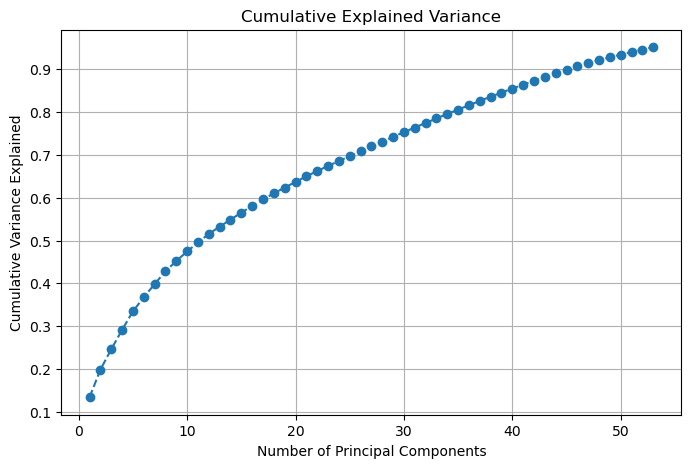

In [61]:
# Cumulative explained variance ratio
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()

### Addressing Class Imbalance Through Data Balancing Techniques

The target variable in the dataset is imbalanced, meaning one class has significantly fewer examples compared to the other(s). This imbalance can lead to biased model predictions favoring the majority class.

Why It Matters: Machine learning models tend to perform poorly on the minority class in such scenarios, resulting in low recall, precision, or F1-scores for the minority class.

#### Synthetic Data Generation
Applied SMOTE and ADASYN to generate synthetic data points for the minority class. These synthetic examples are based on interpolation between existing data points, reducing overfitting risks associated with simple duplication.

Note that do not apply SMOTE on the test set. Balancing is only for training data to prevent data leakage.

In [52]:
#!pip install imbalanced-learn

#### SMOTE
Synthetic Minority Oversampling Technique

In [57]:
# Step 1: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42, stratify=target)

# Step 2: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Display the results
print("Original Class Distribution in Training Data:")
print(pd.Series(y_train).value_counts())

print("\nBalanced Class Distribution in Training Data:")
print(pd.Series(y_train_balanced).value_counts())

print("\nShape of Balanced Data:")
print(f"Features: {X_train_balanced.shape}, Target: {y_train_balanced.shape}")

Original Class Distribution in Training Data:
Bankrupt?
0    5279
1     176
Name: count, dtype: int64

Balanced Class Distribution in Training Data:
Bankrupt?
0    5279
1    5279
Name: count, dtype: int64

Shape of Balanced Data:
Features: (10558, 90), Target: (10558,)


#### ADASYN
Adaptive Synthetic Sampling: good for high dimensional data (many features)

In [58]:
# Apply ADASYN
adasyn = ADASYN(random_state=42)
X_train_balanced, y_train_balanced = adasyn.fit_resample(predictors, target)

# Display the results
print("Original Class Distribution in Training Data:")
print(pd.Series(y_train).value_counts())

print("\nBalanced Class Distribution in Training Data:")
print(pd.Series(y_train_balanced).value_counts())

print("\nShape of Balanced Data:")
print(f"Features: {X_train_balanced.shape}, Target: {y_train_balanced.shape}")

Original Class Distribution in Training Data:
Bankrupt?
0    5279
1     176
Name: count, dtype: int64

Balanced Class Distribution in Training Data:
Bankrupt?
0    6599
1    6523
Name: count, dtype: int64

Shape of Balanced Data:
Features: (13122, 90), Target: (13122,)


### Identifying Unimportant Features (Significant Variables) Using T-Test
The t-test is used to determine whether the mean of a feature differs significantly between the two target classes (class 0 and class 1). This helps identify features that are statistically important for distinguishing between the classes.

In [66]:
# T-test for difference between classes

X_balanced, y_balanced = smote.fit_resample(predictors, target)

# T-test Function
def perform_t_tests(X, y, alpha=0.05):
    numerical_features = X.select_dtypes(include=['float', 'int']).columns
    t_test_results = []

    for feature in numerical_features:
        
        # Separate data into two groups based on target variable
        group1 = X[y == 0][feature]
        group2 = X[y == 1][feature]
        
        # Perform t-test
        t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Welch's t-test
        
        # Store results
        t_test_results.append({
            'Feature': feature,
            'T-Statistic': t_stat,
            'P-Value': p_value,
            'Significant': p_value < alpha  # True if p-value is below alpha
        })

    return pd.DataFrame(t_test_results)

# Perform t-tests
t_test_results = perform_t_tests(X_balanced, y_balanced)
t_test_results

,Feature,T-Statistic,P-Value,Significant
0,X1,81.831702,0.000000e+00,True
1,X2,78.329163,0.000000e+00,True
2,X3,80.618068,0.000000e+00,True
3,X5,39.430899,0.000000e+00,True
4,X6,0.137026,8.910148e-01,False
...,...,...,...,...
85,X90,19.916283,8.833623e-86,True
86,X91,-21.098960,8.706245e-96,True
87,X92,-2.655203,7.936728e-03,True
88,X93,0.802506,4.222818e-01,False


In [68]:
# Identify non-significant variables (False significants)
non_significant_vars = t_test_results[t_test_results['Significant'] == False]['Feature'].tolist()

# Display the results
print("Non-Significant Variables (False Significants):")
print(non_significant_vars)


Non-Significant Variables (False Significants):
['X6', 'X24', 'X33', 'X39', 'X53', 'X58', 'X62', 'X63', 'X73', 'X75', 'X85', 'X93']


### Conclusion

Based on a rigorous feature selection process, we identified 78 predictors as more important than others for our analysis. This decision was guided by the following steps:

T-Test Results: We performed t-tests to assess the significance of each predictor in distinguishing between the target classes.
Features with statistically significant differences (p-value < 0.05) were retained.

Removal of completely Correlated Variables: We identified and removed predictors with collinearity 1 or -1 to minimize redundancy and potential multicollinearity issues.

Elimination of Constant Variables: Predictors with constant values were excluded as they provide no variance or discriminatory power.

This is the final list of variables that were removed and the rest of variables entered into the predictive model:

In [69]:
# List of  deleted features
deleted_features = ["X4", "X6", "X24", "X33", "X37", "X39", "X53", "X58", "X62", "X63", "X73", "X75", "X77", "X78", "X85", "X93", "X94"]

# Find and print the variable names for each Xi
print("Deleted features:")
for label in deleted_features:
    print(f"{label}: {col_names_dict[label]}")

Deleted features:
X4:  Operating Gross Margin
X6:  Operating Profit Rate
X24:  Realized Sales Gross Profit Growth Rate
X33:  Current Ratio
X37:  Debt ratio %
X39:  Long-term fund suitability ratio (A)
X53:  Allocation rate per person
X58:  Quick Assets/Current Liability
X62:  Inventory/Working Capital
X63:  Inventory/Current Liability
X73:  Working capitcal Turnover Rate
X75:  Cash Flow to Sales
X77:  Current Liability to Liability
X78:  Current Liability to Equity
X85:  Liability-Assets Flag
X93:  Interest Coverage Ratio (Interest expense to EBIT)
X94:  Net Income Flag


In [ ]:
# Create and store the processed data

# Strip the column names of raw data
column_names = df.columns.to_list()
for i, column in enumerate(column_names):
    column_names[i] = column.strip()
df.columns = column_names

# Dropping 17 columnns. 1 constant column. 4 columns that have corelation 1 or -1 with another column.
# And 12 nonsignificant variables concluded from T-Test.
removed_indices = [4, 6, 24, 33, 37, 39, 53, 58, 62, 63, 73, 75, 77, 78, 85, 93, 94]
df.drop(columns=[column_names[i] for i in removed_indices], inplace=True)

# Save the processed data
file_path = '../data/processed/data.csv'
df.to_csv(file_path, index=False)

df.shape

(6819, 79)

In the next notebooks, we will evaluate different models on this processed data. Note that we have also evaluated the models using all variables (including both significant and non-significant ones) as well as the variables coming from the above principal components analysis. However, the models' performance did not change significantly. To streamline the report, we have omitted detailed results for other experiments, and we will only present the results for the models with the processed data.